# NAME- SOHIT PATHAK

ROLL NO:- MA22M019

Q.1 Support Vector Machine:

Data and other details are available at 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Use the weblink and reproduce the result for SVM.

Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 
Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits? 
For both datasets, provide a step-by-step code, including:  

Loading the dataset 
Visualizing the data 
Splitting the data into training and testing sets 
Initializing and training the SVM model 
Testing the model 
Additionally, without using libraries (implement from scratch)

Use Precision, Recall, F-1 Score, and accuracy on test data to evaluate the performance of the SVM model.
Plot confusion matrix for test data

In [61]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
from sklearn.datasets import load_iris
iris_data = load_iris()


In [3]:
type(iris_data)


sklearn.utils._bunch.Bunch

In [4]:
iris_data.keys()



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
# independed variable
print(iris_data['target_names'])
sepal_features = iris_data['feature_names'][:2]
sepal_features

['setosa' 'versicolor' 'virginica']


['sepal length (cm)', 'sepal width (cm)']

In [20]:
iris_df = pd.DataFrame(data=iris_data['data'][:, :2], columns=sepal_features)
iris_df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [21]:

iris_df['Iris type'] = iris_data['target']
iris_df.head()


,sepal length (cm),sepal width (cm),Iris type
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [23]:
iris_df['Iris name'] = iris_df['Iris type'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
iris_df.head()


,sepal length (cm),sepal width (cm),Iris type,Iris name
0,5.1,3.5,0,sentosa
1,4.9,3.0,0,sentosa
2,4.7,3.2,0,sentosa
3,4.6,3.1,0,sentosa
4,5.0,3.6,0,sentosa


In [24]:
def f(x):
    if x == 0:
        val = 'setosa'
    elif x == 1:
        val = 'versicolor'
    else:
        val = 'virginica'
    return val

In [25]:
iris_df['test'] = iris_df['Iris type'].apply(f)
iris_df.head()

,sepal length (cm),sepal width (cm),Iris type,Iris name,test
0,5.1,3.5,0,sentosa,setosa
1,4.9,3.0,0,sentosa,setosa
2,4.7,3.2,0,sentosa,setosa
3,4.6,3.1,0,sentosa,setosa
4,5.0,3.6,0,sentosa,setosa


In [26]:
iris_df.drop(['test'], axis =1, inplace = True)

In [27]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   Iris type          150 non-null    int32  
 3   Iris name          150 non-null    object 
dtypes: float64(2), int32(1), object(1)
memory usage: 4.2+ KB


In [28]:
iris_df.describe()

,sepal length (cm),sepal width (cm),Iris type
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,1.000000
std,0.828066,0.435866,0.819232
min,4.300000,2.000000,0.000000
25%,5.100000,2.800000,0.000000
50%,5.800000,3.000000,1.000000
75%,6.400000,3.300000,2.000000
max,7.900000,4.400000,2.000000


In [29]:
iris_df.groupby(['Iris name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
Iris name                                                                  
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
Iris name                                                                   
sentosa                50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           Iris type                                     
               count mean  std  min  25%  50%  75%  max  
Iris name                                                
sentosa         50.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
versicolor      50.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
virginica       50.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0

In [30]:
#Data visualization¶


In [31]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'Iris type', 'Iris name'], dtype='object')

In [32]:
# im just making a function in order not to repeat the same code
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    
    sns.violinplot(x='Iris name',y= y2, data=iris_df)

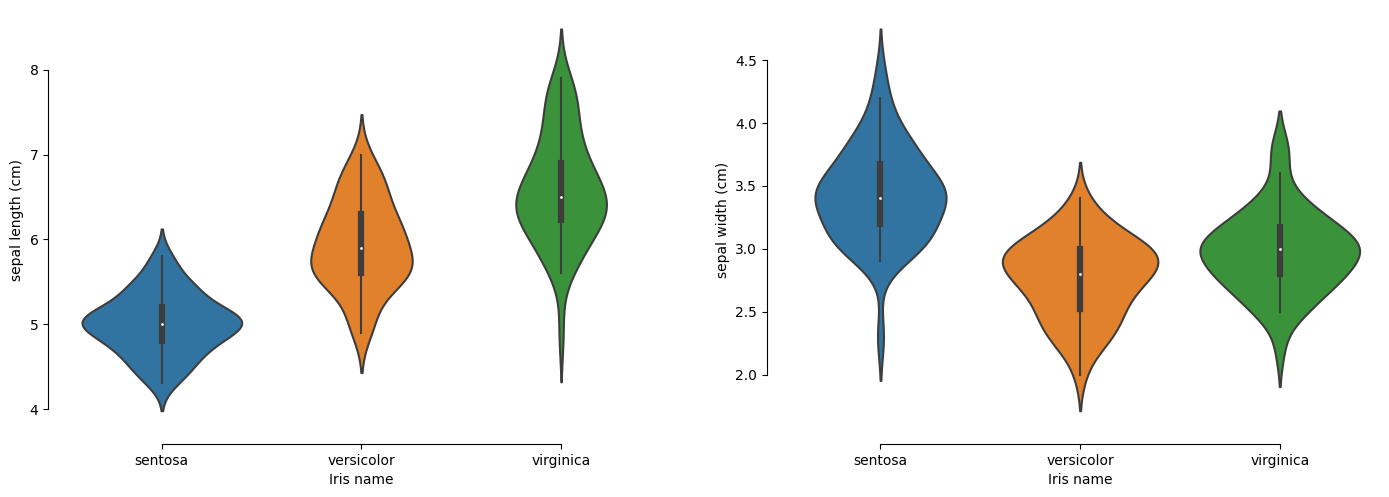

In [33]:
plt.figure(figsize=(17,12))
i = 1
for measurement in iris_df.columns[:-2]:
    plot_violin(measurement,i)
    sns.despine(offset=10, trim=True)
    i += 1

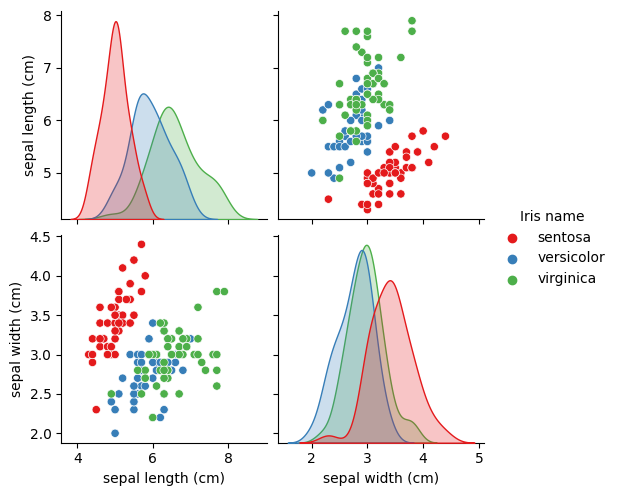

In [35]:
sns.pairplot(iris_df, hue = 'Iris name', vars = ['sepal length (cm)', 'sepal width (cm)'], palette = 'Set1' );

In [37]:
iris_df.iloc[:,:2].corr()



,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


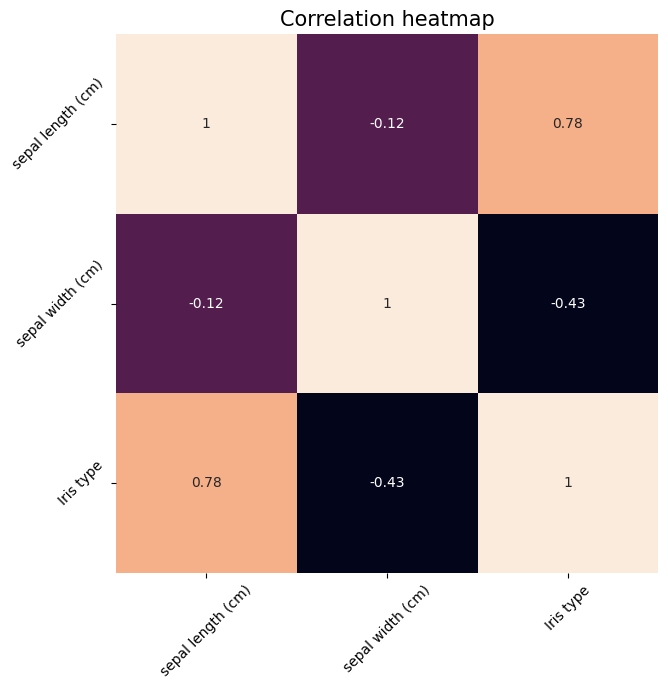

In [38]:
fig, axes = plt.subplots(figsize=(7,7))
sns.heatmap(iris_df.iloc[:,:4].corr(), annot = True, cbar=False)
axes.tick_params(labelrotation=45)
plt.title('Correlation heatmap', fontsize = 15);

In [39]:
#Training our ML model¶


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['Iris name']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred) # for accuracy

[[13  0  0]
 [ 0 11  5]
 [ 0  4  5]]


0.7631578947368421

In [57]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (9,7), fontsize=14):
 
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize = 12)
    plt.xlabel('Predicted label', fontsize = 12)
    plt.title('Confusion Matrix', fontsize = 16)
   

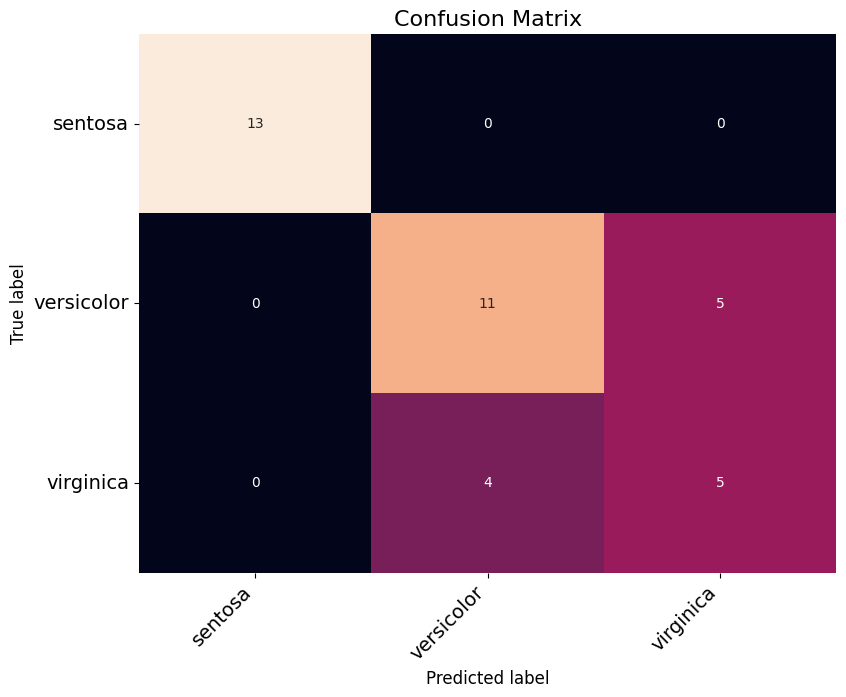

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print_confusion_matrix(confusion_matrix(y_test, y_pred), ['sentosa', 'versicolor', 'virginica'])

In [59]:
print(classification_report(y_test, y_pred)) # precision,recall,f1-score

              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        13
  versicolor       0.73      0.69      0.71        16
   virginica       0.50      0.56      0.53         9

    accuracy                           0.76        38
   macro avg       0.74      0.75      0.75        38
weighted avg       0.77      0.76      0.77        38



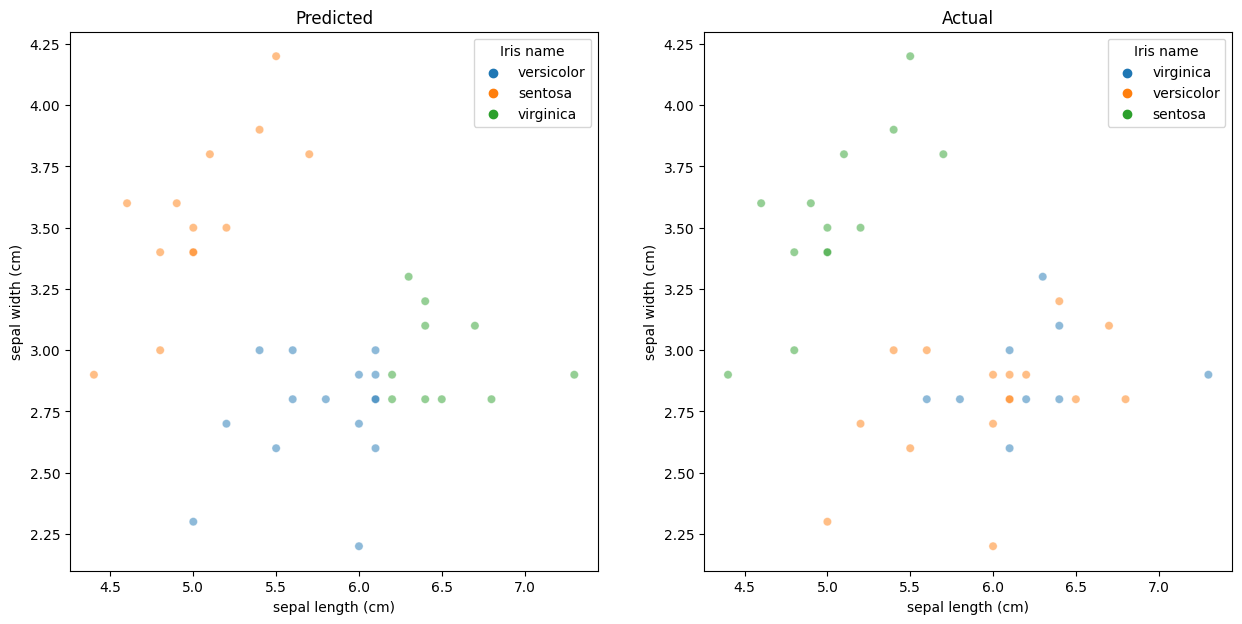

In [60]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.scatterplot(x = X_test['sepal length (cm)'], y = X_test['sepal width (cm)'], hue = y_pred, alpha = 0.5)
plt.title('Predicted')
plt.legend(title='Iris name')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.scatterplot(x = X_test['sepal length (cm)'], y = X_test['sepal width (cm)'], hue = y_test, alpha = 0.5)
plt.title('Actual');

# Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits

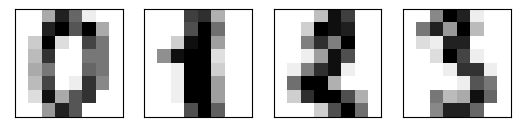

In [76]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the digits dataset
digits = load_digits()

# Visualize the first few digits
fig, axes = plt.subplots(nrows=1, ncols=4)
for i in range(4):
    ax = axes[i]
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()





In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Initialize and train the SVM model
clf = SVC(kernel='linear', C=1, gamma='auto')
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)


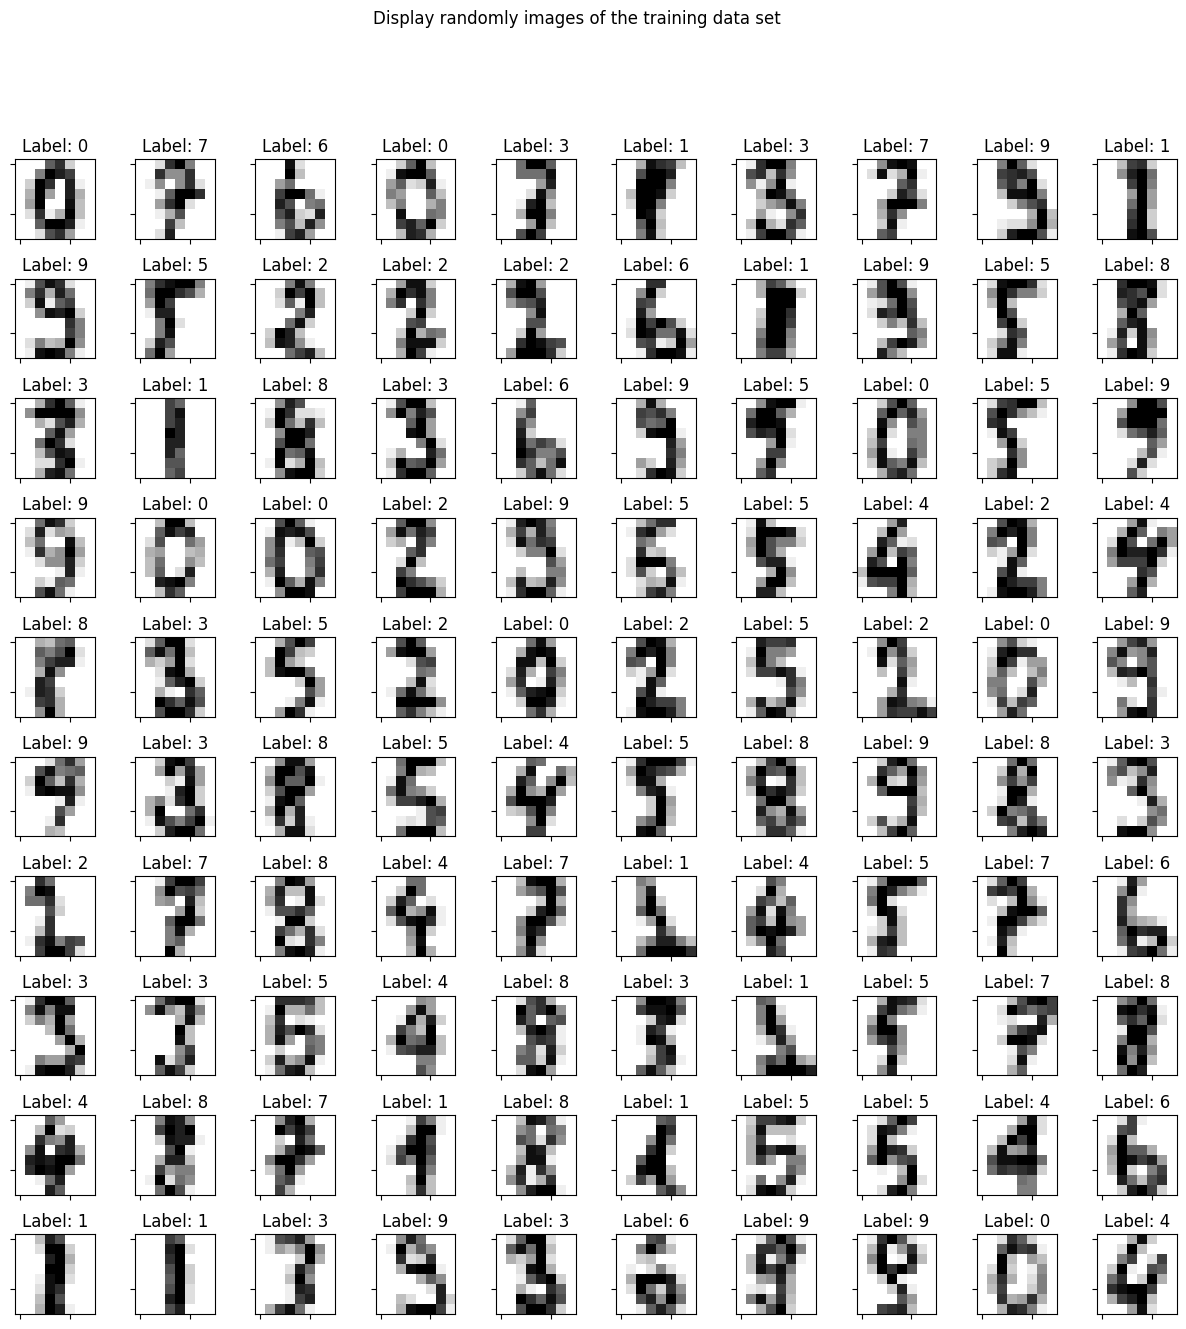

In [84]:


def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(X_train,y_train)  

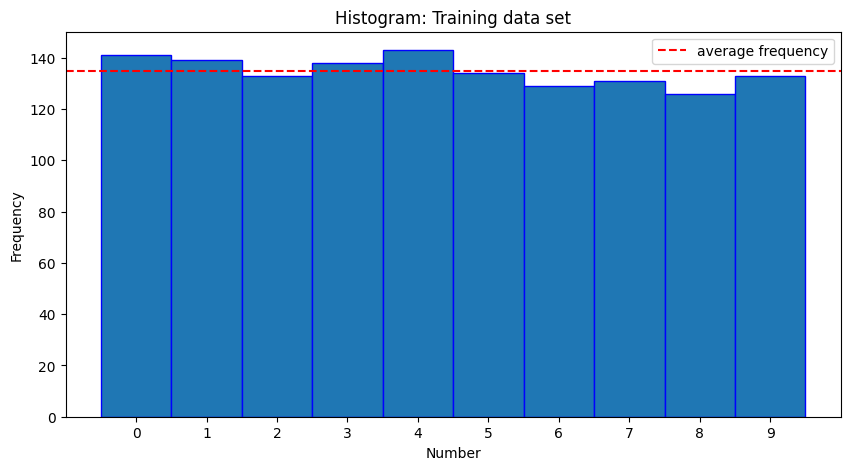

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(y_train, bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar", align='left')
ax.set_title('Histogram: Training data set')
ax.set(xlabel='Number', ylabel='Frequency')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])
ax.axhline(y=(y_train.size/10), label="average frequency", linestyle='dashed', color='r')
ax.legend()
plt.show()


In [78]:

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9711111111111111
Precision: 0.9714311576233408
Recall: 0.9724239185137253
F1 score: 0.9717373353133952


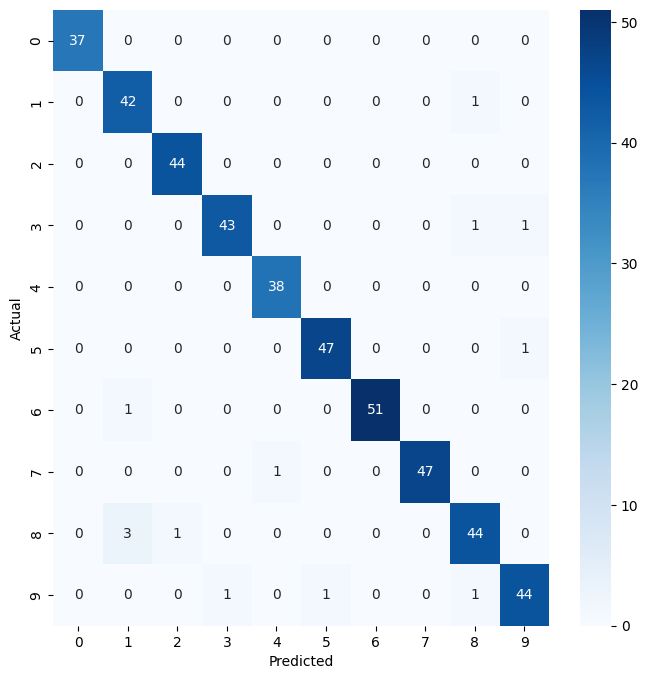

In [79]:

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Q. 2 Principal Component Analysis:

To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py. 
DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition). 
Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison). 
Are you getting the same result?

In [94]:

import numpy as np

from scipy import stats

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(4000))
x = np.random.normal(scale=0.5, size=(4000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

In [95]:
print(a.T)
print(a.shape)
mat_a = a.reshape((4000, 1))

[ 0.61434319  0.09869732 -0.16292618 ...  0.13622489  0.50744604
 -0.07358431]
(4000,)


In [96]:
mat_b = b.reshape((4000, 1))

In [97]:
mat_c = c.reshape((4000, 1))

In [98]:
import numpy as np

X = np.zeros((4000,1))

print(X.shape)

X = np.add(X, mat_a)
bc = np.hstack((mat_b, mat_c))

# Add bc as a new column to X
X = np.hstack((X, bc))
# X = np.vstack((X, mat_b, mat_c))

(4000, 1)


In [99]:
def cov(X):
    return np.cov(X.T)

In [100]:
from numpy.linalg import eig


eigval, eigvec = eig(cov(X)) 

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eigvec), axis=0)
signs = np.sign(eigvec[max_abs_idx, range(eigvec.shape[0])])
eigvec = eigvec*signs[np.newaxis,:]
eigvec= eigvec.T


In [101]:
eig_pairs = [(np.abs(eigval[i]), eigvec[i,:]) for i in range(len(eigval))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eigval_sorted = np.array([x[0] for x in eig_pairs])
eigvec_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(1.07675242425329, array([ 0.34216943,  0.77749286, -0.52765986])), (0.41962005863351914, array([0.70972123, 0.15417638, 0.68740484])), (0.0026012924366271175, array([ 0.61580505, -0.60970033, -0.49904875]))]


In [102]:
k = 2
W = eigvec_sorted[:k, :] # Projection matrix

print(W.shape)

(2, 3)


In [103]:
import numpy as np

def explained_variance_ratio(eigval_sorted):
    
    total_var = np.sum(eigval_sorted)
    explained_var = [eigval / total_var for eigval in eigval_sorted]
    explained_var_ratio = np.cumsum(explained_var)
    return explained_var_ratio

In [104]:
explained_var_ratio = explained_variance_ratio(eigval_sorted)
# explained_var_ratio = explained_variance_ratio(eigval_sorted)
print(explained_var_ratio)
# print(explained_var)

[0.71832639 0.99826462 1.        ]


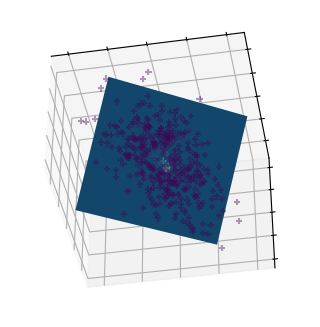

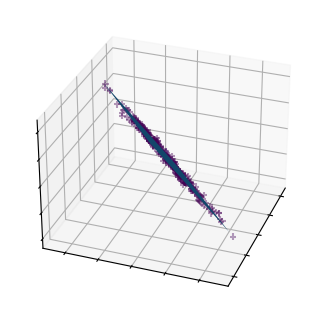

In [105]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(mat_a[::10], mat_b[::10], mat_c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)


    
    V =  eigvec_sorted.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()



#comparision with given 

In [107]:
import numpy as np

from scipy import stats

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(4000))
x = np.random.normal(scale=0.5, size=(4000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

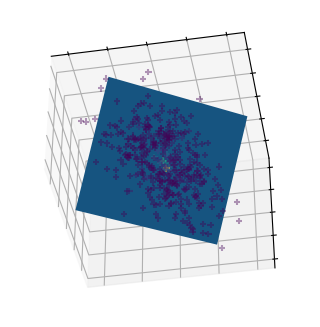

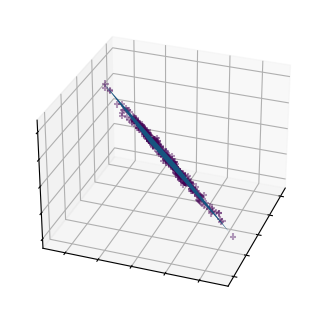

In [108]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()


In [110]:
# other code taken from online

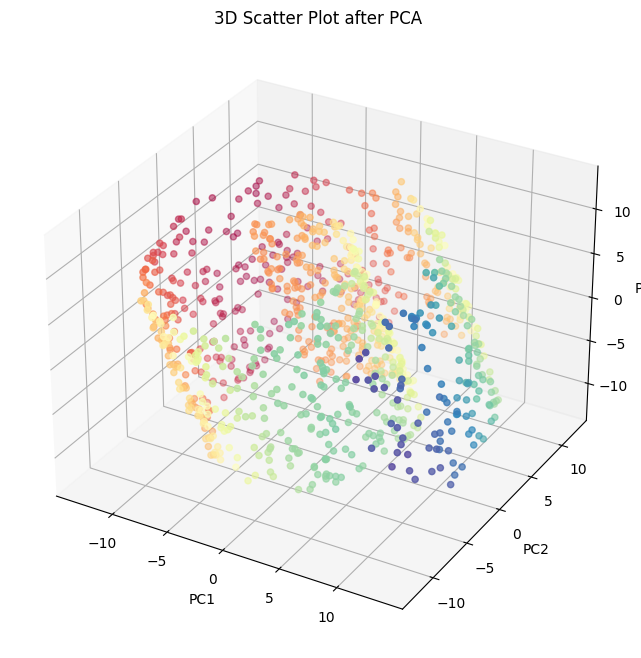

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

# load the dataset
X, _ = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# center the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# calculate the covariance matrix
covariance = np.cov(X_centered.T)

# perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# sort the eigenvectors by eigenvalues in decreasing order
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:,idx]
eigenvalues = eigenvalues[idx]

# project the data onto the first 3 principal components
X_pca = X_centered.dot(eigenvectors[:,:3])

# plot the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=X[:, 2], cmap=plt.cm.Spectral)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot after PCA')
plt.show()
